In [ ]:
pip install --upgrade networkx_robustness


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from ast import literal_eval
from networkx_robustness import networkx_robustness
import random


In [ ]:
# import the data
OD_edges = pd.read_csv('OD_edges.csv', converters={'to': literal_eval, 'from': literal_eval}, index_col = None).drop(columns = 'Unnamed: 0')
PN_edges = pd.read_csv('PN_edges.csv', converters={'to': literal_eval, 'from': literal_eval}, index_col = None).drop(columns = 'Unnamed: 0')
node = pd.read_csv('node.csv', converters={'Nearest_Stop': literal_eval, 'location': literal_eval}, index_col = None)

In [ ]:
PN_edges

,from,to,total_ridership,distance
0,"(3, 30 Av)","(2, Astoria Blvd)",6.702221e+04,493.366940
1,"(4, Broadway)","(3, 30 Av)",1.332698e+05,647.455046
2,"(5, 36 Av)","(4, Broadway)",1.755904e+05,654.543978
3,"(6, 39 Av-Dutch Kills)","(5, 36 Av)",1.868389e+05,511.796935
4,"(613, Lexington Av/59 St)","(6, 39 Av-Dutch Kills)",1.869945e+05,3102.837813
...,...,...,...,...
382,"(606, Court Sq)","(461, Queensboro Plaza)",2.473093e+07,581.760240
383,"(463, Hunters Point Av)","(606, Court Sq)",2.854118e+07,616.734011
384,"(464, Vernon Blvd-Jackson Av)","(463, Hunters Point Av)",2.896297e+07,395.648133
385,"(610, Grand Central-42 St)","(464, Vernon Blvd-Jackson Av)",3.025646e+07,2130.368440


In [ ]:
OD_edges

,from,to,ridership
0,"(613, Lexington Av/59 St)","(8, 5 Av/59 St)",22703.242048
1,"(613, Lexington Av/59 St)","(9, 57 St-7 Av)",90110.579481
2,"(613, Lexington Av/59 St)","(10, 49 St)",50646.331644
3,"(613, Lexington Av/59 St)","(607, 34 St-Herald Sq)",294736.474136
4,"(613, Lexington Av/59 St)","(13, 28 St)",12904.802181
...,...,...,...
159595,"(443, Baychester Av)","(358, Newkirk Av-Little Haiti)",1384.034081
159596,"(443, Baychester Av)","(359, Flatbush Av-Brooklyn College)",2251.977076
159597,"(443, Baychester Av)","(446, Morris Park)",612.387116
159598,"(443, Baychester Av)","(445, Pelham Pkwy)",693.015911


In [ ]:
# node

#Network Creation

In [ ]:
## ORIGIN DESTINATION NETWORK

#adding edges
gOD = nx.from_pandas_edgelist(OD_edges, source='from', target='to', edge_attr='ridership')

#adding the nodes
for index, row in node.iterrows():
    gOD.add_node(row['Nearest_Stop'], location = row['location'], borough = row['borough'], routes = row['routes'])

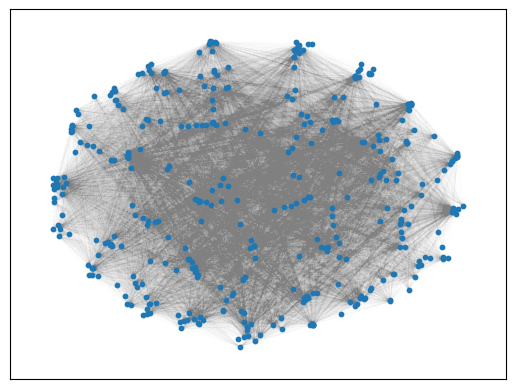

In [ ]:
## DRAW NETWORK
nx.draw_networkx(gOD, nx.spring_layout(gOD), with_labels=False, node_size=10, edge_color='gray', width=.001)
plt.show()

In [ ]:
## PN NETWORK

#adding edges
gPN = nx.from_pandas_edgelist(PN_edges, source='from', target='to', edge_attr='total_ridership')

#adding the nodes
for index, row in node.iterrows():
    gPN.add_node(row['Nearest_Stop'], location = row['location'], borough = row['borough'], routes = row['routes'])

In [ ]:
node = node.set_index('Nearest_Stop')

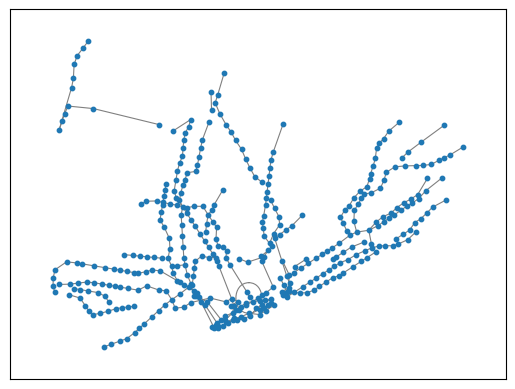

In [ ]:
## DRAW NETWORK
nx.draw_networkx(gPN,  pos = node['location'].to_dict(), with_labels=False, node_size=10, edge_color='gray', width=.8)
plt.show()

[((225, '47-50 Sts-Rockefeller Ctr'), 45617352.981680535),
 ((610, 'Grand Central-42 St'), 23804480.26959169),
 ((607, '34 St-Herald Sq'), 21175800.272165366),
 ((602, '14 St-Union Sq'), 18195294.706444167),
 ((628, 'Fulton St'), 15128648.23310627),
 ((164, '34 St-Penn Station'), 14647226.131342014),
 ((614, '59 St-Columbus Circle'), 13878902.316937665),
 ((318, '34 St-Penn Station'), 13698590.11771138),
 ((616, '74 St-Broadway'), 11842229.48435104),
 ((624, 'Chambers St'), 10337945.142846752)]

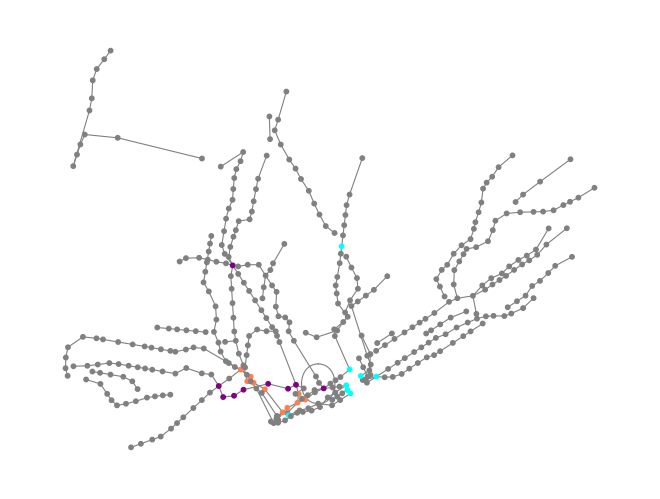

In [ ]:
dc = sorted(dict(gOD.degree(weight = 'ridership')).items(), key = lambda x: x[1], reverse = True)[:10]
DegreeCentDf = pd.DataFrame({'rank' : [i + 1 for i in range(10)], 'Station and Ridership': [str(i) for i in dc]})

bc = sorted(dict(nx.betweenness_centrality(gPN, weight = 'total_ridership')).items(), key = lambda x: x[1], reverse = True)[:10]
BetweenCentDf = pd.DataFrame({'rank' : [i + 1 for i in range(10)], 'Station': [str(i[0]) for i in bc]})

cc = sorted(dict(nx.closeness_centrality(gPN)).items(), key = lambda x: x[1], reverse = True)[:10]
CloseCentDf = pd.DataFrame({'rank' : [i + 1 for i in range(10)], 'Station': [str(i[0]) for i in cc]})

colors = ['cyan', 'purple', 'coral']
nodes = list(gPN.nodes())
col_assign = ['gray' for i in range(len(nodes))]
partition_num = 0
for i in [dc, bc, cc]:
  for j in i:
    indexOfNode = nodes.index(j[0])
    col_assign[indexOfNode] = colors[partition_num]
  partition_num += 1
nx.draw(gPN, node_color=col_assign, pos = node['location'].to_dict(), with_labels=False, node_size=10, edge_color='gray', width=.8)
dc


# Cluster Analysis

In [ ]:
import itertools

# Find the communities
comp = nx.algorithms.community.girvan_newman(gPN)

# Get the first partition
partition = []
for communities in itertools.islice(comp, 1):
    partition = tuple(sorted(c) for c in communities)

# Compute the modularity
print(partition)
print(len(partition))
print(nx.algorithms.community.quality.modularity(gPN, partition))

([(2, 'Astoria Blvd'), (3, '30 Av'), (4, 'Broadway'), (5, '36 Av'), (6, '39 Av-Dutch Kills'), (8, '5 Av/59 St'), (9, '57 St-7 Av'), (10, '49 St'), (613, 'Lexington Av/59 St')], [(13, '28 St'), (14, '23 St'), (16, '8 St-NYU'), (17, 'Prince St'), (109, 'Fresh Pond Rd'), (110, 'Forest Av'), (111, 'Seneca Av'), (113, 'Knickerbocker Av'), (114, 'Central Av'), (118, '3 Av'), (119, '1 Av'), (120, 'Bedford Av'), (122, 'Graham Av'), (123, 'Grand St'), (124, 'Montrose Av'), (125, 'Morgan Av'), (126, 'Jefferson St'), (127, 'DeKalb Av'), (129, 'Halsey St'), (130, 'Wilson Av'), (131, 'Bushwick Av-Aberdeen St'), (228, '23 St'), (282, '21 St'), (283, 'Greenpoint Av'), (284, 'Nassau Av'), (318, '34 St-Penn Station'), (319, '28 St'), (320, '23 St'), (321, '18 St'), (323, 'Christopher St-Sheridan Sq'), (324, 'Houston St'), (325, 'Canal St'), (326, 'Franklin St'), (327, 'Chambers St'), (328, 'WTC Cortlandt'), (329, 'Rector St'), (403, '33 St'), (404, '28 St'), (405, '23 St'), (407, 'Astor Pl'), (409, 'Sp

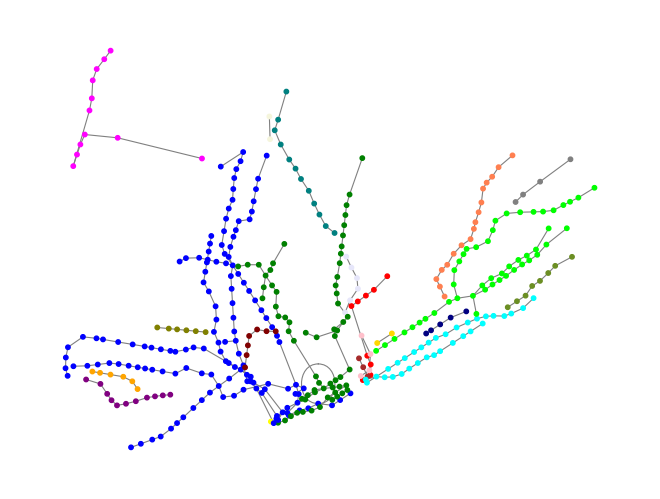

In [ ]:
colors = [
    'red', 'green', 'blue', 'yellow', 'purple', 'orange',
    'cyan', 'magenta', 'lime', 'pink', 'teal', 'lavender',
    'brown', 'beige', 'maroon', 'olivedrab', 'olive', 'coral',
    'navy', 'grey', 'gold'
]
nodes = list(gPN.nodes())
col_assign = ['na' for i in range(len(nodes))]
partition_num = 0
for i in partition:
  for j in i:
    indexOfNode = nodes.index(j)
    col_assign[indexOfNode] = colors[partition_num]
  partition_num += 1
col_assign
nx.draw(gPN, node_color=col_assign, pos = node['location'].to_dict(), with_labels=False, node_size=10, edge_color='gray', width=.8)


# Robustness Analysis

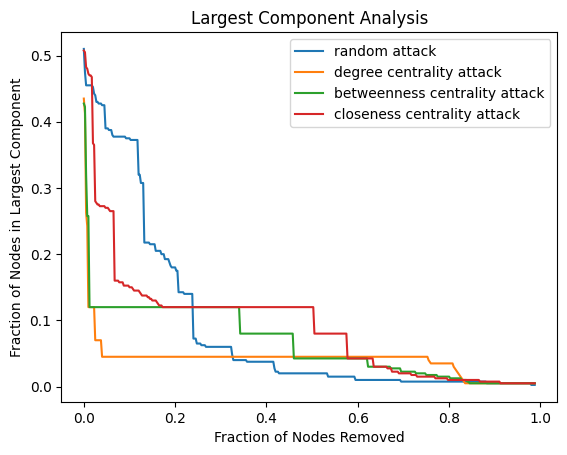

In [ ]:
attack_fraction = .99
n = len(gPN)
# random
initial, frac_lc_random, apl_random = networkx_robustness.simulate_random_attack(gPN, attack_fraction=attack_fraction)
frac_removed_random = [i/n for  i in range(len(frac_lc_random))]
plt.plot(frac_removed_random, frac_lc_random, label = 'random attack')

# degree centrality attack
initial, frac_lc_degree, apl_degree = networkx_robustness.simulate_degree_attack(gPN, attack_fraction=attack_fraction)
frac_removed_degree = [i/n for  i in range(len(frac_lc_degree))]
plt.plot(frac_removed_degree, frac_lc_degree, label = 'degree centrality attack')

# betweenness centrality attack
initial, frac_lc_betweenness, apl_betweenness = networkx_robustness.simulate_betweenness_attack(gPN, attack_fraction=attack_fraction)
frac_removed_betweenness = [i/n for  i in range(len(frac_lc_betweenness))]
plt.plot(frac_removed_betweenness, frac_lc_betweenness, label = 'betweenness centrality attack')

# closeness centrality attack
initial, frac_lc_closeness, apl_closeness = networkx_robustness.simulate_closeness_attack(gPN, attack_fraction=attack_fraction)
frac_removed_closeness = [i/n for  i in range(len(frac_lc_betweenness))]
plt.plot(frac_removed_closeness, frac_lc_closeness, label = 'closeness centrality attack')

plt.title('Largest Component Analysis')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Fraction of Nodes in Largest Component')
plt.legend()
plt.show()


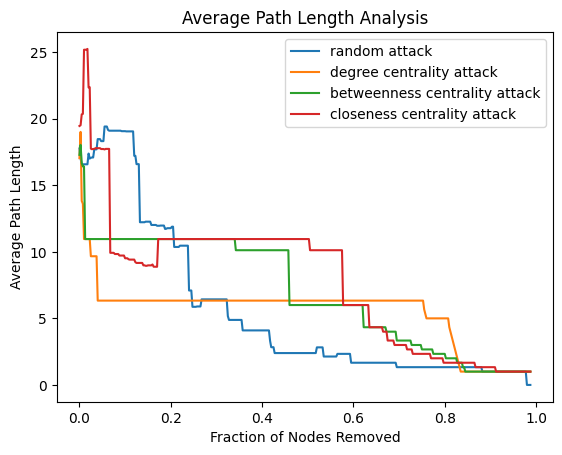

In [ ]:
# random
frac_removed_random = [i/n for  i in range(len(frac_lc_random))]
plt.plot(frac_removed_random, apl_random, label = 'random attack')

# degree centrality attack
frac_removed_degree = [i/n for  i in range(len(frac_lc_degree))]
plt.plot(frac_removed_degree, apl_degree, label = 'degree centrality attack')

# betweenness centrality attack
frac_removed_betweenness = [i/n for  i in range(len(frac_lc_betweenness))]
plt.plot(frac_removed_betweenness, apl_betweenness, label = 'betweenness centrality attack')

# closeness centrality attack
frac_removed_closeness = [i/n for  i in range(len(frac_lc_betweenness))]
plt.plot(frac_removed_closeness, apl_closeness, label = 'closeness centrality attack')

plt.title('Average Path Length Analysis')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Average Path Length')
plt.legend()
plt.show()


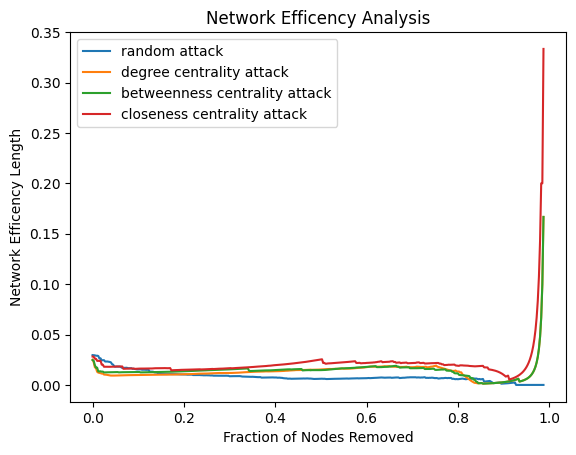

In [ ]:
# Efficency

# random
gPNrandom = gPN.copy()
fraction_removed_random = []
efficiency_random = []
for i in range(int(n * attack_fraction)):
    gPNrandom.remove_node(random.choice(list(gPNrandom.nodes())))
    eff = nx.global_efficiency(gPNrandom)
    if eff != 1:
      fraction_removed_random.append(i/n)
      efficiency_random.append(eff)
plt.plot(fraction_removed_random, efficiency_random, label = 'random attack')


# degree centrality
gPNdegree = gPN.copy()
degree = nx.degree(gPNdegree)
sorted_degree = sorted(dict(degree).items(), key = lambda x: x[1], reverse = True)
fraction_removed_degree = []
efficiency_degree = []
for i in range(int(n * attack_fraction)):
    gPNdegree.remove_node(sorted_degree[i][0])
    eff = nx.global_efficiency(gPNdegree)
    if eff != 1:
      fraction_removed_degree.append(i/n)
      efficiency_degree.append(eff)
plt.plot(fraction_removed_degree, efficiency_degree, label = 'degree centrality attack')

# betweenness centrality
gPNbetweenness = gPN.copy()
betweenness = nx.betweenness_centrality(gPNbetweenness)
sorted_betweenness = sorted(dict(betweenness).items(), key = lambda x: x[1], reverse = True)
fraction_removed_betweenness = []
efficiency_betweenness = []
for i in range(int(n * attack_fraction)):
    gPNbetweenness.remove_node(sorted_betweenness[i][0])
    eff = nx.global_efficiency(gPNbetweenness)
    if eff != 1:
      fraction_removed_betweenness.append(i/n)
      efficiency_betweenness.append(eff)
plt.plot(fraction_removed_betweenness, efficiency_betweenness, label = 'betweenness centrality attack')

# closeness centrality
gPNcloseness = gPN.copy()
closeness = nx.closeness_centrality(gPNcloseness)
sorted_closeness = sorted(dict(closeness).items(), key = lambda x: x[1], reverse = True)
fraction_removed_closeness = []
efficiency_closeness = []
for i in range(int(n * attack_fraction)):
    gPNcloseness.remove_node(sorted_closeness[i][0])
    eff = nx.global_efficiency(gPNcloseness)
    if eff != 1:
      fraction_removed_closeness.append(i/n)
      efficiency_closeness.append(eff)
plt.plot(fraction_removed_closeness, efficiency_closeness, label = 'closeness centrality attack')



plt.title('Network Efficency Analysis')
plt.xlabel('Fraction of Nodes Removed')
plt.ylabel('Network Efficency Length')
plt.legend()
plt.show()

Find Centrality (degree, closeness, betweeness)

Top 10 nodes by degree centrality:
Node: (225, '47-50 Sts-Rockefeller Ctr'), Degree Centrality: 1.0
Node: (610, 'Grand Central-42 St'), Degree Centrality: 0.52183
Node: (607, '34 St-Herald Sq'), Degree Centrality: 0.4642
Node: (602, '14 St-Union Sq'), Degree Centrality: 0.39887
Node: (628, 'Fulton St'), Degree Centrality: 0.33164
Node: (164, '34 St-Penn Station'), Degree Centrality: 0.32109
Node: (614, '59 St-Columbus Circle'), Degree Centrality: 0.30425
Node: (318, '34 St-Penn Station'), Degree Centrality: 0.30029
Node: (616, '74 St-Broadway'), Degree Centrality: 0.2596
Node: (624, 'Chambers St'), Degree Centrality: 0.22662


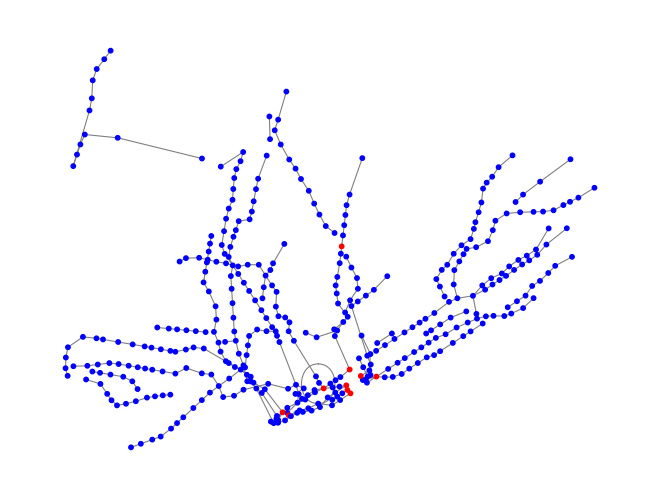

In [ ]:
#Find degree centrality using OD network
degree_centrality_OD = {}

for node in gOD.nodes:
    weighted_degree_OD = sum(gOD[node][neighbor]['ridership'] for neighbor in gOD.neighbors(node))
    degree_centrality_OD[node] = weighted_degree_OD

# Normalize the degree centrality values with the sum of the ridership

max_degree = max(degree_centrality_OD.values())
degree_centrality_normalized = {node: value / max_degree for node, value in degree_centrality_OD.items()}

# Sort nodes by normalized degree centrality in descending order and get the top 10
top_10_degree = sorted(degree_centrality_normalized, key=degree_centrality_normalized.get, reverse=True)[:10]

# Print the results
print("Top 10 nodes by degree centrality:")
for node in top_10_degree:
    print(f"Node: {node}, Degree Centrality: {round(degree_centrality_normalized[node],5)}")

nodes = list(gPN.nodes)
col_assign = ['blue' for i in range(len(nodes))]
for i in top_10_degree:
  index = nodes.index(i)
  col_assign[index] = 'red'
pos = nx.get_node_attributes(gPN, 'location')
nx.draw(gPN, node_color=col_assign, pos=pos, with_labels=False, node_size=10, edge_color='gray', width=0.8)

Top 10 nodes by closeness centrality:
Node: (636, 'Jay St-MetroTech'), Closeness Centrality: 0.04504
Node: (173, 'High St'), Closeness Centrality: 0.04442
Node: (628, 'Fulton St'), Closeness Centrality: 0.04393
Node: (26, 'DeKalb Av'), Closeness Centrality: 0.04371
Node: (623, 'Canal St'), Closeness Centrality: 0.04367
Node: (175, 'Hoyt-Schermerhorn Sts'), Closeness Centrality: 0.04323
Node: (622, 'Chambers St'), Closeness Centrality: 0.0432
Node: (103, 'Bowery'), Closeness Centrality: 0.04277
Node: (617, 'Atlantic Av-Barclays Ctr'), Closeness Centrality: 0.04252
Node: (17, 'Prince St'), Closeness Centrality: 0.04219


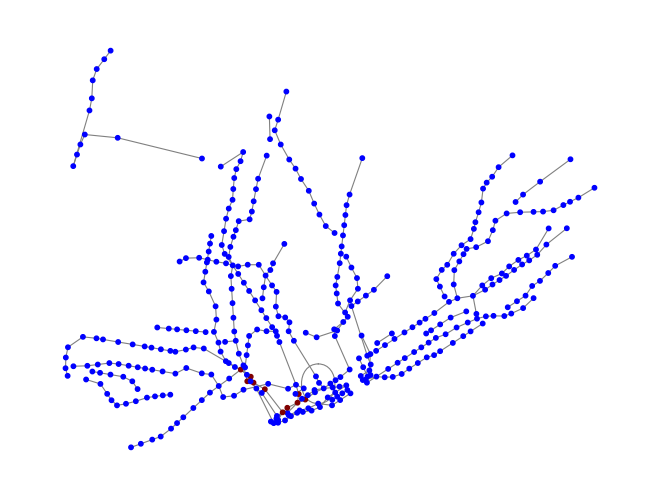

In [ ]:
#Find Closeness Centrality using distance
closeness_centrality = nx.closeness_centrality(gPN,distance ="distance")
top_10_nodes_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:10]

print("Top 10 nodes by closeness centrality:")
for node in top_10_nodes_closeness:
    print(f"Node: {node}, Closeness Centrality: {round(closeness_centrality[node],5)}")

nodes = list(gPN.nodes)
col_assign = ['blue' for i in range(len(nodes))]
for i in top_10_nodes_closeness:
  index = nodes.index(i)
  col_assign[index] = 'maroon'
pos = nx.get_node_attributes(gPN, 'location')
nx.draw(gPN, node_color=col_assign, pos=pos, with_labels=False, node_size=10, edge_color='gray', width=0.8)

Top 10 nodes by betweenness centrality:
Node: (608, '4 Av-9 St'), Betweenness Centrality: 0.13166
Node: (625, 'Delancey St-Essex St'), Betweenness Centrality: 0.12589
Node: (234, 'East Broadway'), Betweenness Centrality: 0.11535
Node: (235, 'York St'), Betweenness Centrality: 0.1149
Node: (236, 'Bergen St'), Betweenness Centrality: 0.11444
Node: (237, 'Carroll St'), Betweenness Centrality: 0.11398
Node: (238, 'Smith-9 Sts'), Betweenness Centrality: 0.11349
Node: (617, 'Atlantic Av-Barclays Ctr'), Betweenness Centrality: 0.10519
Node: (621, 'Broadway Junction'), Betweenness Centrality: 0.09885
Node: (602, '14 St-Union Sq'), Betweenness Centrality: 0.09706


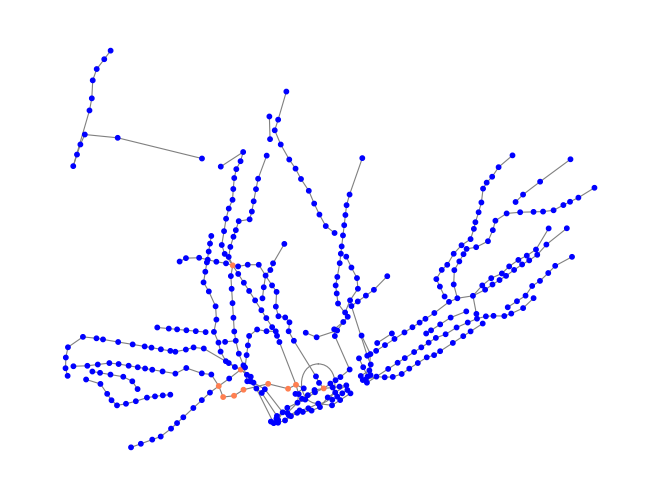

In [ ]:
#Find Betweeness Centrality
betweenness_centrality = nx.betweenness_centrality(gPN, weight='total_ridership')
top_10_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

print("Top 10 nodes by betweenness centrality:")
for node in top_10_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {round(betweenness_centrality[node],5)}")

nodes = list(gPN.nodes)
col_assign = ['blue' for i in range(len(nodes))]
for i in top_10_betweenness:
  index = nodes.index(i)
  col_assign[index] = 'coral'
pos = nx.get_node_attributes(gPN, 'location')
nx.draw(gPN, node_color=col_assign, pos=pos, with_labels=False, node_size=10, edge_color='gray', width=0.8)